In [67]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
from scipy.optimize import minimize

plt.rcParams["figure.figsize"] = (18, 10)

### ARCH(1)

#### Model

Suppose $w_t \sim N(0, 1)$ then an *ARCH(1)* model with parameters $a, b$ is given as

$$ x_{t+1} = \sqrt{a + b x_{t}^2} w_{t+1} $$

#### Likelihood

The "likelihood" of the observations $\{x_t\}_{t=1,\dots,T}$ is given as

$$\ell(a, b) = - \sum_{t=1}^{T-1} \left\{ \text{ln} z_t + \frac{x_{t+1}^2}{z_t} \right\}$$

where $z_t := a + b x_t^2$.

In [68]:
def simulate_arch_process(n_sims, a, b):
    x = np.empty(n_sims)
    w = np.random.normal(size=n_sims)
    
    x[0] = 1
    for t in range(n_sims - 1):
        x[t + 1] = np.sqrt(a + b * x[t] ** 2) * w[t]
    
    return x

In [69]:
def arch_likelihood(a, b, data):
    A = a.reshape(a.shape + (1,))
    
    Y = data[1:]
    X = data[:-1]
    Z = A + np.tensordot(b, (X ** 2), axes=0)
    
    like = -np.sum(np.log(Z) + Y ** 2 / Z, axis=2)
    return like

In [70]:
x = simulate_arch_process(500, 0.5, 0.5)

In [81]:
n_points = 100

a_grid = np.linspace(0.3, 0.8, n_points)
b_grid = a_grid

A, B = np.meshgrid(a_grid, b_grid)

like = arch_likelihood(A, B, x)

In [82]:
a_argmax, b_argmax = np.unravel_index(like.argmax(), like.shape)

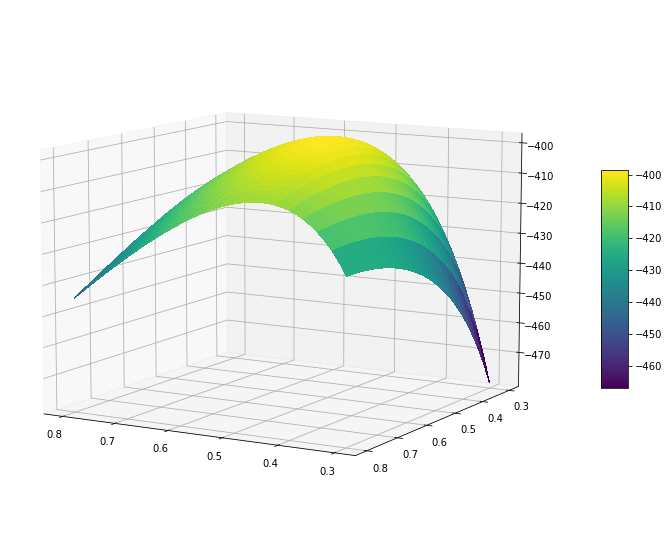

In [93]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(10, 120)

surf = ax.plot_surface(
    A, B, like, linewidth=0, antialiased=False, cmap=cm.viridis, rstride=5, cstride=5
)

fig.colorbar(surf, shrink=.4, aspect=8)

plt.show()